# Imports 

In [79]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

# Question 2
Calculate the Alternate Allele Frequencies(AAF) and put them in the same pandas dataframe as the initial data. Then plot a histogram from this data

In [44]:
filename='matrix_1kg.txt'
snp_df=pd.read_csv(filename,sep='\t')
#drops first four text columns and then averages over whole runs (divided by an extra two because there are two chromosomes)
snp_df['AAF']=snp_df.drop(['CHROM','POS','REF','ALT'],axis=1).sum(axis=1)/(2548*2)
snp_df

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144,AAF
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000392
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.019231
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.003336
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.002159
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.020604
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000196
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.001374
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.028846


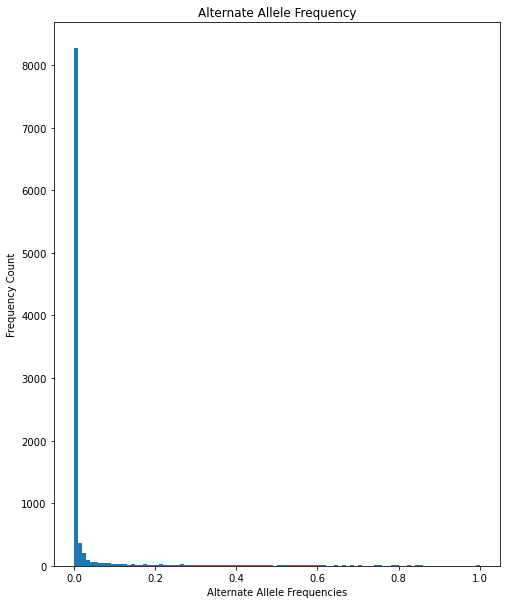

In [66]:
#plot histogram 
fig,ax=plt.subplots(figsize=(8,10))
ax.hist(snp_df['AAF'],bins=100)
ax.set_xlabel("Alternate Allele Frequencies")
ax.set_ylabel("Frequency Count")
ax.set_title("Alternate Allele Frequency")
plt.show()

# Question 3
Use boolean indexing to get a common subset with AAF between 0.05 and 0.95

In [58]:
common_subset=snp_df[(snp_df['AAF']>0.05) & (snp_df['AAF']<0.95)]
common_subset

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144,AAF
20,chr21,26683267,T,G,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0.080259
32,chr21,37584553,T,C,1,2,1,1,1,1,...,1,2,0,0,0,1,1,1,0,0.595761
38,chr21,34522570,A,T,0,1,2,1,1,1,...,1,0,1,1,1,1,2,0,1,0.405612
41,chr21,41704121,A,G,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.094388
46,chr21,29502200,G,T,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.097527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,chr21,40748951,T,C,1,2,2,2,2,2,...,2,2,2,2,2,2,2,1,2,0.841837
9959,chr21,42683839,C,T,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0.115973
9974,chr21,38472865,C,G,0,1,1,0,0,1,...,1,0,0,0,1,1,0,0,0,0.180730
9975,chr21,43359202,C,T,2,1,0,1,0,1,...,2,2,2,2,1,2,2,2,2,0.810047


# Question 4
PCA Analysis. First remove the AAF row that I added to the dataframe. Then transpose the dataframe, standardize the mean/variance, and perform a PCA with ten components

In [52]:
#remove unused columns
pca_input=snp_df.iloc[:,4:-1]
#transpose dataframe 
pca_input=pca_input.T
#check output
pca_input

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
HG00096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00099,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NA21141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NA21142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NA21143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
#standarize componens and perform analysis
pca_input_standardized=StandardScaler().fit_transform(pca_input)
pca=PCA(n_components=10)
pca_output=pca.fit_transform(pca_input_standardized)
pca_output

array([[-8.33942982e+00, -1.04287772e+01, -2.50792100e+00, ...,
         5.39126088e-01, -4.55331192e-01,  4.81134910e-03],
       [-8.46123843e+00, -1.03233464e+01, -5.29504510e+00, ...,
        -2.70386541e-01,  4.64562489e-01, -4.27351222e-01],
       [-8.29420011e+00, -9.02379973e+00, -2.84470980e+00, ...,
         2.86306751e-01,  2.50832834e-01,  9.66105043e-01],
       ...,
       [-6.33274903e+00, -3.78076245e+00,  7.02006454e+00, ...,
         6.26076573e-01,  8.12783782e-01, -2.49603004e-01],
       [-8.61492142e+00, -2.74363758e+00,  8.74209815e+00, ...,
         1.17211881e-01,  2.40444118e-01, -1.17089040e+00],
       [-6.07966909e+00, -1.78566623e+00,  9.18215182e+00, ...,
         9.23416184e-01, -3.93721859e-02,  2.58794406e-01]])

In [54]:
#make a df with the output with the named columns that we choose 
pca_output_df=pd.DataFrame(data=pca_output,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

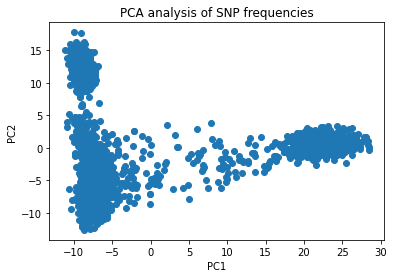

In [84]:
#plot the PCA
fig,ax=plt.subplots()
ax.scatter(x=pca_output_df['PC1'],y=pca_output_df['PC2'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA analysis of SNP frequencies')
plt.show()

# Advanced Questions 
Add the labels to each sample, and then graph the PCs both in two and three dimensions with each label 

In [85]:
#readd sample to df
pca_output_df['sample']=pca_input.index
#make dataframe for metadata (lables)
df_meta=pd.read_csv('integrated_call_samples_v3.20130502.ALL.panel',sep='\t')
#merge the two dfs 
pca_output=pd.merge(pca_output_df,df_meta,on='sample')
pca_output

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,samples,sample,pop,super_pop,gender,Unnamed: 4,Unnamed: 5
0,-8.339430,-10.428777,-2.507921,-0.344706,-5.263301,-0.468241,1.639276,0.539126,-0.455331,0.004811,HG00096,HG00096,GBR,EUR,male,NaN,NaN
1,-8.461238,-10.323346,-5.295045,-0.308092,-2.965011,-0.686099,0.212629,-0.270387,0.464562,-0.427351,HG00097,HG00097,GBR,EUR,female,NaN,NaN
2,-8.294200,-9.023800,-2.844710,-0.766905,-4.393626,-0.370601,0.502890,0.286307,0.250833,0.966105,HG00099,HG00099,GBR,EUR,female,NaN,NaN
3,-7.921072,-9.075263,-5.271441,-0.282246,-2.531353,0.220681,0.042803,-0.679893,-0.184906,0.678964,HG00100,HG00100,GBR,EUR,female,NaN,NaN
4,-8.883854,-10.099707,-5.309419,0.380742,-0.965450,-0.045528,0.734625,-0.173433,0.058635,-0.285242,HG00101,HG00101,GBR,EUR,male,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,-8.045113,-0.478140,8.893698,0.587508,3.221630,0.494941,-0.925314,0.363550,1.234254,-0.938958,NA21137,NA21137,GIH,SAS,female,NaN,NaN
2499,-8.438440,-3.946037,11.105467,0.371873,1.372909,0.016717,0.484429,0.315767,-0.164721,1.596842,NA21141,NA21141,GIH,SAS,female,NaN,NaN
2500,-6.332749,-3.780762,7.020065,0.839952,1.215758,1.076447,-0.374988,0.626077,0.812784,-0.249603,NA21142,NA21142,GIH,SAS,female,NaN,NaN
2501,-8.614921,-2.743638,8.742098,-0.212236,1.529304,0.112790,-0.465777,0.117212,0.240444,-1.170890,NA21143,NA21143,GIH,SAS,female,NaN,NaN


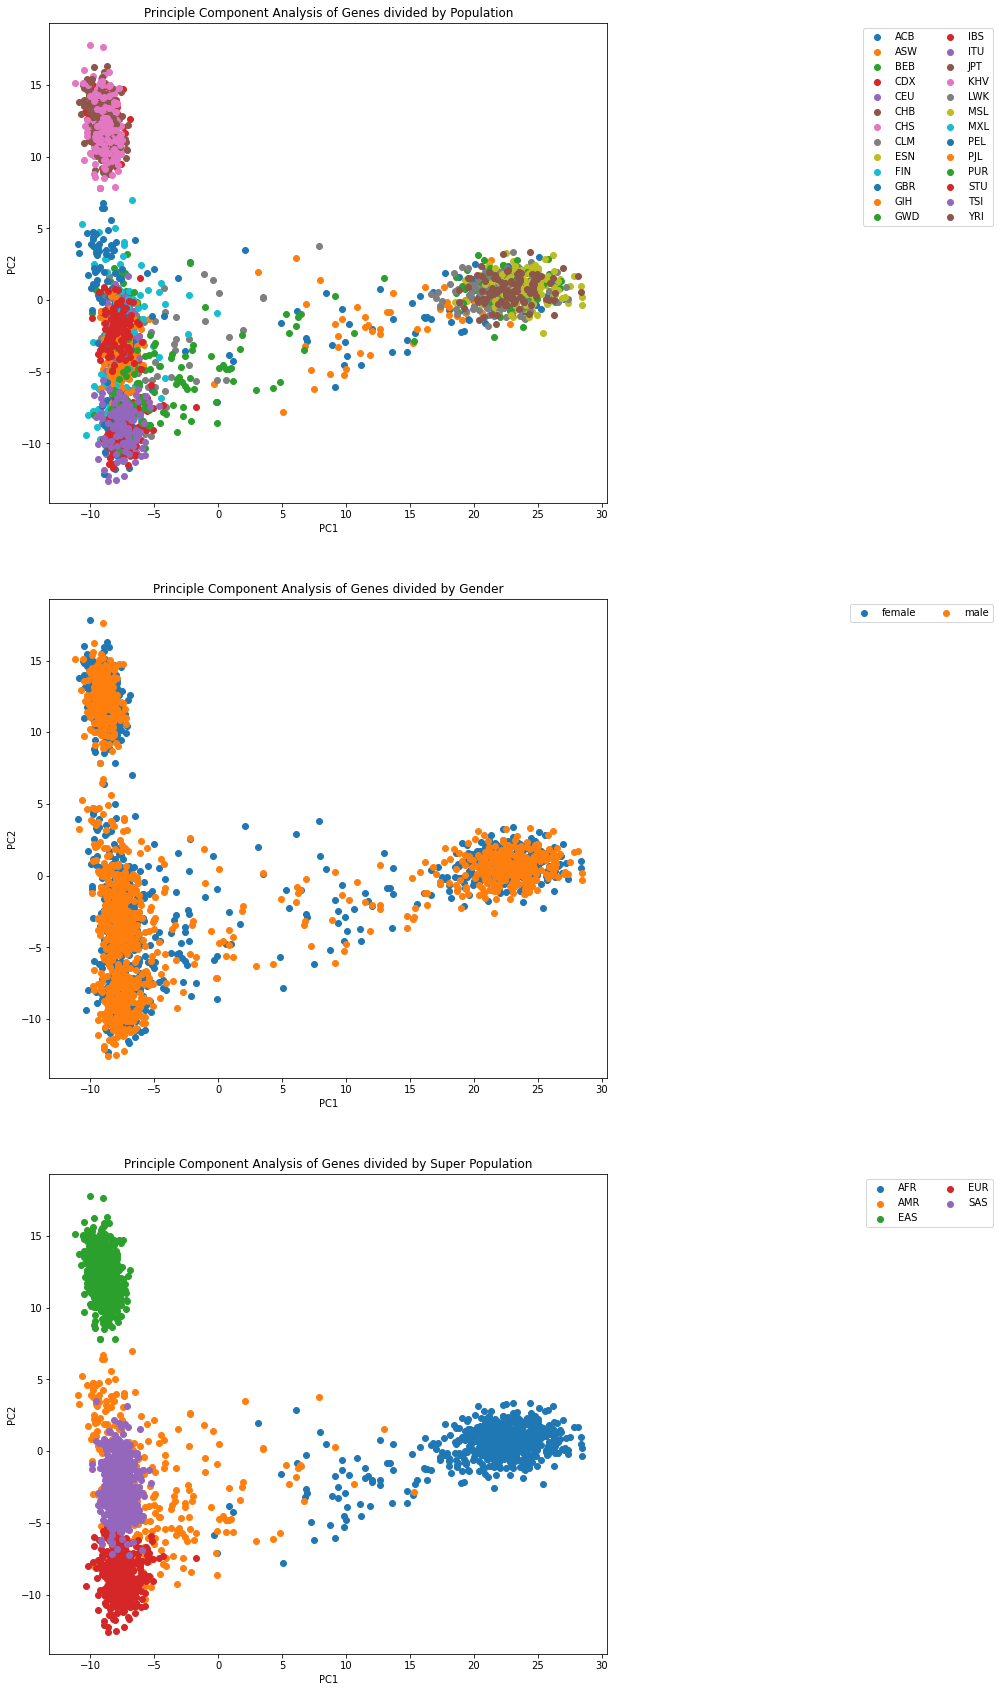

In [89]:
#plot 
fig,ax=plt.subplots(nrows=3,figsize=(10,30))

#pop
pop=pca_output.groupby("pop")
for p_name,group in pop:
    ax[0].scatter(x=group['PC1'],y=group['PC2'],label=p_name)
ax[0].legend(bbox_to_anchor=(1.7,1),loc= 'upper right', ncol=2)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('Principle Component Analysis of Genes divided by Population')



#gender
gender=pca_output.groupby("gender")
for g_name,group in gender:
    ax[1].scatter(x=group['PC1'],y=group['PC2'],label=g_name)
ax[1].legend(bbox_to_anchor=(1.7,1),loc= 'upper right', ncol=2)
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('Principle Component Analysis of Genes divided by Gender')

#superpop
superpop=pca_output.groupby("super_pop")
for super_name,group in superpop:
    ax[2].scatter(x=group['PC1'],y=group['PC2'],label=super_name)
ax[2].legend(bbox_to_anchor=(1.7,1),loc= 'upper right', ncol=2)
ax[2].set_xlabel('PC1')
ax[2].set_ylabel('PC2')
ax[2].set_title('Principle Component Analysis of Genes divided by Super Population')
plt.show()

# 3D Plot

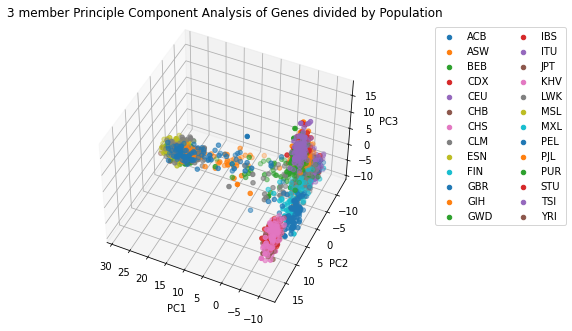

In [99]:
fig=plt.figure()
ax=Axes3D(fig)
for p_name,group in pop:
    ax.scatter(xs=group['PC1'],ys=group['PC2'],zs=group['PC3'],label=p_name)
plt.legend(bbox_to_anchor=(1.7,1),loc= 'upper right', ncol=2)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3 member Principle Component Analysis of Genes divided by Population')
#change view angle
ax.view_init(45, 115)
plt.show()
    